<a href="https://colab.research.google.com/github/Denis-Yen/DataScience/blob/main/2_DataWranling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución normal

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


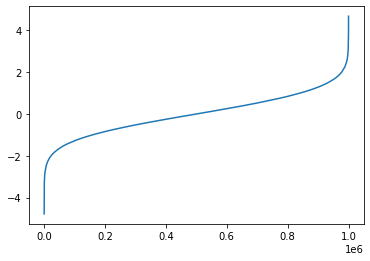

In [ ]:
%matplotlib inline
data = np.random.randn(1000000)
x = range(1, 1000001)
plt.plot(x, sorted(data))

(array([7.40000e+01, 1.87900e+03, 2.40360e+04, 1.33012e+05, 3.20023e+05,
        3.34307e+05, 1.53574e+05, 3.03510e+04, 2.64400e+03, 1.00000e+02]),
 array([-4.77743618, -3.83267546, -2.88791474, -1.94315402, -0.9983933 ,
        -0.05363258,  0.89112815,  1.83588887,  2.78064959,  3.72541031,
         4.67017103]),
 <a list of 10 Patch objects>)

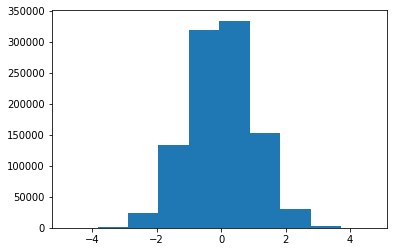

In [ ]:
plt.hist(sorted(data))

### Crear un fucnion de distribución normal



(array([   8.,   72.,  394., 1470., 2784., 2863., 1698.,  578.,  115.,
          18.]),
 array([-4.38966844, -2.45291683, -0.51616521,  1.4205864 ,  3.35733802,
         5.29408963,  7.23084125,  9.16759286, 11.10434448, 13.0410961 ,
        14.97784771]),
 <a list of 10 Patch objects>)

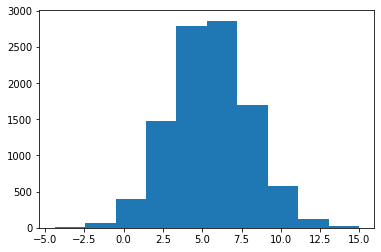

In [ ]:
mu = 5.5
sd = 2.5
z = np.random.randn(10000)
data = mu + sd* z # z = (x -mu)/sd -> N(0,1), X = mu + sd*Z
plt.hist(data)

In [ ]:
data = np.random.rand(2, 4)
data

array([[0.38779134, 0.22612368, 0.08475487, 0.51807548],
       [0.96922278, 0.41203407, 0.83898609, 0.01663714]])

# Simulación de montecarlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1.
* Calcularemos x * x + y * y
  * Si el valor es inferior a 1 -> estamos dentro del circulo 
  * Si el valor es superior a 1 -> estamos fuera del circulo 
* Calcularemos el nuemro total de veces  que esta dentrod el circulo y lo dividiremso entre el total  de intentos para obtener una aproximación de la probabilidad de caer dentro del circulo.
* Usamos dicha probabilidad para aproximar el valor de pi.
* Repetimos el experimento un numero suficente de veces (por ejemmplo 1000) par a obtener (1000)  diferentes aproxiamcione de pi.
* Calculamos el promedio del 1000 experiemntos anteriores  para dar un valor final de pi.





In [ ]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    n = 1000
    pi_value_list = []
    for i in range(n_exp):
      value = 0
      x = np.random.uniform(0,1, n).tolist()
      y = np.random.uniform(0,1, n).tolist()
      for j in range(n):
          z = np.sqrt(x[j] * x[j] + y[j] * y[j])
          if z<=1:
              value += 1
      float_value = float(value)
      pi_value = float_value * 4 / n
      pi_value_list.append(pi_value)
      pi_avg += pi_value
    pi = pi_avg / n_exp
    print(pi)
    fig = plt.plot(pi_value_list)
    return(pi, fig) 


3.1452199999999992


(3.1452199999999992, [<matplotlib.lines.Line2D at 0x7f53f858eb10>])

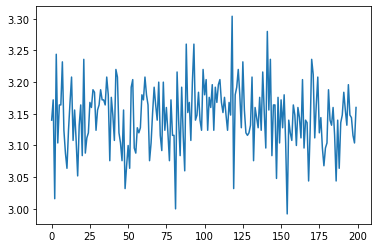

In [ ]:
pi_montecarlo(1000, 200)

# Dummy DataFrames

In [ ]:
n = 100000
data = pd.DataFrame(
    {
      'A': np.random.randn(n),
      'B': 1.5 + 2.5*np.random.randn(n),
      'C': np.random.uniform(5, 32, n)
    }
)
data.head()


,A,B,C
0,0.536335,3.580799,7.805721
1,-1.139177,0.310548,7.448014
2,1.493887,1.771340,8.576847
3,0.126135,-0.406383,22.809576
4,-0.260739,0.231409,10.383015


In [ ]:
data.describe()

,A,B,C
count,100000.000000,100000.000000,100000.000000
mean,-0.003057,1.504678,18.482133
std,0.999954,2.502806,7.811366
min,-4.010835,-8.742795,5.000591
25%,-0.676474,-0.192496,11.674198
50%,-0.002905,1.499651,18.477065
75%,0.675957,3.193999,25.242526
max,4.067807,14.143861,31.999787


(array([6.7000e+01, 1.0390e+03, 7.7050e+03, 2.4468e+04, 3.5205e+04,
        2.3255e+04, 7.1820e+03, 1.0130e+03, 6.4000e+01, 2.0000e+00]),
 array([-8.7427954 , -6.45412976, -4.16546412, -1.87679848,  0.41186716,
         2.70053281,  4.98919845,  7.27786409,  9.56652973, 11.85519537,
        14.14386101]),
 <a list of 10 Patch objects>)

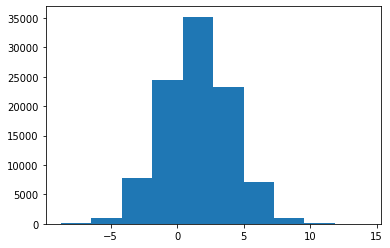

In [ ]:
plt.hist(data['B'])

In [ ]:
n = 10
data = pd.DataFrame(
    {
      'A': np.random.randn(n),
      'B': 1.5 + 2.5*np.random.randn(n),
      'C': np.random.uniform(5, 32, n)
    }, index = range(10, 10 + n) # Se agrega el index y ya no esta enumerada 
)
data

,A,B,C
10,0.849874,1.550281,30.959579
11,-0.392978,2.881357,30.583895
12,0.459290,0.153253,17.920142
13,-0.107772,4.591605,26.280279
14,0.710891,3.891244,18.917779
15,-1.755255,2.647010,8.972123
16,-0.236909,-4.348290,16.797867
17,-0.031603,1.970806,13.802880
18,-1.935685,5.530638,5.016111
19,1.117726,0.482373,11.273045


# Agregación de datos por categoria


In [ ]:
gender = ["Male", "Female"]
income = ["Poor", "Midle Class", "Rich"]

In [ ]:
n = 500
gender_data = []
income_data = []
for i in range(0,n):
  gender_data.append(np.random.choice(gender))
  income_data.append(np.random.choice(income))

gender_data[1:10]
income_data[1:10]

['Poor',
 'Rich',
 'Midle Class',
 'Poor',
 'Rich',
 'Midle Class',
 'Midle Class',
 'Poor',
 'Poor']

In [ ]:
height = 160 + 30*np.random.randn(n)
weight = 65 + 25*np.random.randn(n)
age = 30 + 12*np.random.randn(n)
income = 1800 + 3500 * np.random.randn(n)

In [ ]:
data = pd.DataFrame(
    {
      "Gender" : gender_data,
      'Economic status': income_data,
      'Height': height,
      'Weight': weight,
      'Age': age,
      'Income': income
    }

)

data.head()

,Gender,Economic status,Height,Weight,Age,Income
0,Male,Rich,172.158760,80.596235,31.436497,-711.406131
1,Female,Poor,178.040214,73.396410,50.672524,-1070.664982
2,Male,Rich,111.530431,17.601142,36.979868,8184.327069
3,Female,Midle Class,158.030333,74.595895,31.261843,-4648.443114
4,Male,Poor,142.331812,65.877078,56.173206,4574.481068


# Agrupación de datos

In [ ]:
gruped_gender = data.groupby("Gender")

In [ ]:
gruped_gender.groups

{'Female': [1, 3, 10, 11, 17, 18, 23, 24, 25, 26, 28, 29, 30, 31, 33, 37, 41, 42, 45, 46, 48, 53, 54, 57, 61, 62, 63, 66, 70, 72, 75, 76, 77, 79, 84, 87, 88, 90, 91, 92, 94, 95, 96, 97, 98, 101, 107, 108, 109, 113, 116, 120, 121, 124, 125, 128, 129, 132, 133, 134, 135, 136, 137, 140, 142, 143, 144, 145, 147, 148, 149, 150, 153, 154, 155, 156, 158, 159, 161, 163, 164, 167, 170, 173, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 191, 192, 193, 194, 196, ...], 'Male': [0, 2, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21, 22, 27, 32, 34, 35, 36, 38, 39, 40, 43, 44, 47, 49, 50, 51, 52, 55, 56, 58, 59, 60, 64, 65, 67, 68, 69, 71, 73, 74, 78, 80, 81, 82, 83, 85, 86, 89, 93, 99, 100, 102, 103, 104, 105, 106, 110, 111, 112, 114, 115, 117, 118, 119, 122, 123, 126, 127, 130, 131, 138, 139, 141, 146, 151, 152, 157, 160, 162, 165, 166, 168, 169, 171, 172, 174, 175, 176, 177, 185, 190, 195, 199, 201, 202, ...]}

In [ ]:
for names, groups in gruped_gender:
    print(names)
    print(groups)

Female
     Gender Economic status      Height     Weight        Age       Income
1    Female            Poor  178.040214  73.396410  50.672524 -1070.664982
3    Female     Midle Class  158.030333  74.595895  31.261843 -4648.443114
10   Female     Midle Class  215.741032  71.922508  39.678675  5292.574111
11   Female            Poor  205.989548  43.680857  15.779703  2448.739595
17   Female            Poor  121.475010  49.407011  25.404741 -2745.709313
..      ...             ...         ...        ...        ...          ...
493  Female            Rich  167.992887  40.629060  17.308012  1135.522637
494  Female            Poor  155.943273  54.514281  23.217110 -7944.157766
497  Female     Midle Class  154.245825  13.889237  16.766528  -894.136899
498  Female            Rich  148.911019  68.349203  57.347488 -1259.775665
499  Female            Poor  159.492783  74.569711  35.815724  -674.787041

[253 rows x 6 columns]
Male
    Gender Economic status      Height     Weight        Age    

In [ ]:
gruped_gender.get_group("Female").head()

,Gender,Economic status,Height,Weight,Age,Income
1,Female,Poor,178.040214,73.396410,50.672524,-1070.664982
3,Female,Midle Class,158.030333,74.595895,31.261843,-4648.443114
10,Female,Midle Class,215.741032,71.922508,39.678675,5292.574111
11,Female,Poor,205.989548,43.680857,15.779703,2448.739595
17,Female,Poor,121.475010,49.407011,25.404741,-2745.709313


In [ ]:
# Agrupación a dos niveles
double_group = data.groupby(["Gender", "Economic status"])

In [ ]:
len(double_group)

6

In [ ]:
for names, groups in double_group:
  print(names)
  print(groups)

('Female', 'Midle Class')
     Gender Economic status      Height     Weight        Age       Income
3    Female     Midle Class  158.030333  74.595895  31.261843 -4648.443114
10   Female     Midle Class  215.741032  71.922508  39.678675  5292.574111
18   Female     Midle Class  179.161863  73.564541  28.331569 -2526.751068
23   Female     Midle Class  140.575012  53.387449  17.098829   862.275986
25   Female     Midle Class  152.452834  77.202306  18.502705  1275.698165
..      ...             ...         ...        ...        ...          ...
484  Female     Midle Class  114.158167  68.078388  20.806209  3120.176013
487  Female     Midle Class  181.238283  79.365190  49.467711   961.145208
488  Female     Midle Class  181.457112  10.961274  29.998269  4329.353394
492  Female     Midle Class  119.456969  36.485114  30.800627   102.587084
497  Female     Midle Class  154.245825  13.889237  16.766528  -894.136899

[94 rows x 6 columns]
('Female', 'Poor')
     Gender Economic status     

# Agregación de datos

In [ ]:
double_group.mean()

Height     Weight        Age       Income
Gender Economic status                                               
Female Midle Class      159.036879  65.385972  30.072859  1515.261255
       Poor             161.249605  65.566919  31.027192   723.982113
       Rich             162.648855  65.591786  31.360765  1497.520082
Male   Midle Class      157.617993  65.408441  31.447131  1209.007672
       Poor             158.781889  67.238670  30.564762  2048.129166
       Rich             156.914417  65.124051  29.791476  2032.280384

In [ ]:
double_group.size() # cuantos datos hay por grupo

Gender  Economic status
Female  Midle Class        94
        Poor               81
        Rich               78
Male    Midle Class        70
        Poor               87
        Rich               90
dtype: int64

In [ ]:
double_group.describe() # me devuelve estadisticos descriptivos para cada grupo y cada variable

Height              ...       Income              
                        count        mean  ...          75%           max
Gender Economic status                     ...                           
Female Midle Class       94.0  159.036879  ...  3722.079675   8189.737666
       Poor              81.0  161.249605  ...  2897.359997   7688.813458
       Rich              78.0  162.648855  ...  3919.261247  10677.254328
Male   Midle Class       70.0  157.617993  ...  3451.796394   9846.910954
       Poor              87.0  158.781889  ...  4301.449055   8636.421803
       Rich              90.0  156.914417  ...  4318.241282  10091.158031

[6 rows x 32 columns]

In [ ]:
double_group.count()

Height  Weight  Age  Income
Gender Economic status                             
Female Midle Class          94      94   94      94
       Poor                 81      81   81      81
       Rich                 78      78   78      78
Male   Midle Class          70      70   70      70
       Poor                 87      87   87      87
       Rich                 90      90   90      90

In [ ]:
# GRupo de Ingresos
grouped_incoem = double_group["Income"]
grouped_incoem.describe() # Estaditicos descriptivos para los ingresos una sola variable

count         mean  ...          75%           max
Gender Economic status                      ...                           
Female Midle Class       94.0  1515.261255  ...  3722.079675   8189.737666
       Poor              81.0   723.982113  ...  2897.359997   7688.813458
       Rich              78.0  1497.520082  ...  3919.261247  10677.254328
Male   Midle Class       70.0  1209.007672  ...  3451.796394   9846.910954
       Poor              87.0  2048.129166  ...  4301.449055   8636.421803
       Rich              90.0  2032.280384  ...  4318.241282  10091.158031

[6 rows x 8 columns]

In [ ]:
double_group.aggregate(
   { 
      "Income": np.sum,
      "Age": np.mean,
      "Height": np.std
    }
)

Income        Age     Height
Gender Economic status                                     
Female Midle Class      142434.557965  30.072859  27.021573
       Poor              58642.551120  31.027192  27.560640
       Rich             116806.566414  31.360765  26.246252
Male   Midle Class       84630.537007  31.447131  29.995303
       Poor             178187.237454  30.564762  34.967370
       Rich             182905.234549  29.791476  28.955677

In [ ]:
double_group_sex = data.groupby(["Gender"])
double_group_sex.aggregate(
   { 
      "Income": np.sum,
      "Age": np.mean,
      "Height": np.std
    }
)

,Income,Age,Height
Gender,,,
Female,317883.675498,30.775458,26.895557
Male,445723.009011,30.533062,31.365351


## Transofrmación de datos y operaciones con datso agrupados

In [ ]:
double_group.aggregate(
    {
        "Age": np.sum,
        "Height": lambda h: (np.mean(h))/np.std(h)
    }
)


Age    Height
Gender Economic status                       
Female Midle Class      2826.848769  5.917110
       Poor             2513.202545  5.887174
       Rich             2446.139686  6.237142
Male   Midle Class      2201.299189  5.292697
       Poor             2659.134265  4.567183
       Rich             2681.232877  5.449484

* Calcular a todas las columnas la suma , la media y la desviación.

In [ ]:
double_group.aggregate([np.sum, np.mean, np.std])

Height              ...       Income             
                                 sum        mean  ...         mean          std
Gender Economic status                            ...                          
Female Midle Class      14949.466649  159.036879  ...  1515.261255  3531.249378
       Poor             13061.218021  161.249605  ...   723.982113  3450.093580
       Rich             12686.610706  162.648855  ...  1497.520082  3483.123292
Male   Midle Class      11033.259516  157.617993  ...  1209.007672  3216.234668
       Poor             13814.024325  158.781889  ...  2048.129166  3394.889920
       Rich             14122.297517  156.914417  ...  2032.280384  3686.910822

[6 rows x 12 columns]

In [ ]:
double_group.aggregate([lambda x: np.sum(x) / np.std(x)]) # igual ala función anterior soloq ue usando la función lambda

Height      Weight         Age     Income
                          <lambda>    <lambda>    <lambda>   <lambda>
Gender Economic status                                               
Female Midle Class      556.208375  229.998230  248.266954  40.551735
       Poor             476.861099  209.508013  217.067475  17.103284
       Rich             486.497100  224.819395  206.571639  33.752065
Male   Midle Class      370.488774  189.214373  159.807865  26.503537
       Poor             397.344905  222.645437  259.014689  52.791171
       Rich             490.453559  225.252547  239.140070  49.887272

# Filtrado de datos

In [ ]:
double_group.sum()

Height       Weight          Age         Income
Gender Economic status                                                       
Female Midle Class      14949.466649  6146.281336  2826.848769  142434.557965
       Poor             13061.218021  5310.920476  2513.202545   58642.551120
       Rich             12686.610706  5116.159299  2446.139686  116806.566414
Male   Midle Class      11033.259516  4578.590878  2201.299189   84630.537007
       Poor             13814.024325  5849.764323  2659.134265  178187.237454
       Rich             14122.297517  5861.164606  2681.232877  182905.234549

In [ ]:
double_group["Age"].filter(lambda x: x.sum()>30)

0      31.436497
1      50.672524
2      36.979868
3      31.261843
4      56.173206
         ...    
495    30.057999
496    33.632104
497    16.766528
498    57.347488
499    35.815724
Name: Age, Length: 500, dtype: float64

# Transofrmación de variables

In [ ]:
zcore = lambda x: (x - x.mean())/x.std()
zgroup= double_group.transform(zcore)

(array([ 10.,  22.,  68.,  97., 106.,  97.,  67.,  24.,   8.,   1.]),
 array([-2.60850609, -2.03105687, -1.45360765, -0.87615843, -0.29870922,
         0.27874   ,  0.85618922,  1.43363844,  2.01108766,  2.58853688,
         3.16598609]),
 <a list of 10 Patch objects>)

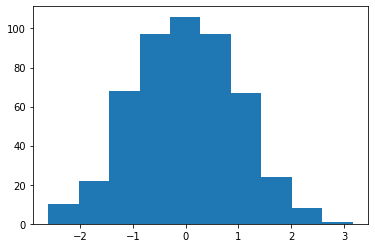

In [ ]:
import matplotlib.pyplot as plt
plt.hist(zgroup["Age"])

In [ ]:
# Reemplzar NAs
fill_na_mean = lambda x: x.fillna(x.mean())
double_group.transform(fill_na_mean)

# Operaciones Diversas

In [ ]:
double_group.head(1)
double_group.tail(1)
double_group.nth(80) # se obtine el nesimo grupo


# Ordenación de columnas

In [ ]:
data_sorted = data.sort_values(["Age", "Income"])
data_sorted.head()

In [ ]:
age_grouped = data_sorted.groupby("Gender")
age_grouped.head()

In [ ]:
age_grouped.head(1) # Los más tiernos

,Gender,Economic status,Height,Weight,Age,Income
416,Male,Midle Class,156.895353,94.257898,-4.396677,1706.721915
490,Female,Poor,180.202041,92.534694,1.154396,-5162.888473


In [ ]:
age_grouped.tail(1) # Los más viejos

,Gender,Economic status,Height,Weight,Age,Income
300,Female,Rich,149.789636,59.022798,58.180612,4239.330733
5,Male,Rich,179.186781,17.405998,65.487303,-5473.465260


# Conjunto de entrenamiento y testing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/Tab Customer Churn Model.txt", sep = "\t")


(3333, 21)

In [ ]:
len(data)

3333

# Dividir usanado la distribución normal

(array([ 19.,  97., 264., 595., 871., 822., 447., 171.,  45.,   2.]),
 array([-3.33791717, -2.63916199, -1.9404068 , -1.24165162, -0.54289644,
         0.15585875,  0.85461393,  1.55336911,  2.25212429,  2.95087948,
         3.64963466]),
 <a list of 10 Patch objects>)

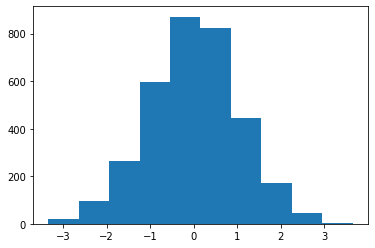

In [ ]:
a = np.random.randn(len(data))
plt.hist(a)

In [ ]:
check = (a<0.8)
check

array([False,  True,  True, ...,  True,  True,  True])

(array([ 714.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2619.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

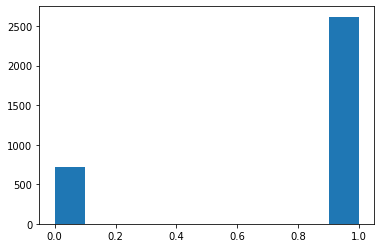

In [ ]:
plt.hist(check.astype(int))

In [ ]:
# Dividimos los datos 80% training y 20% testing
a = np.random.randn(len(data))
check = (a<0.8)
training = data[check]
testing = data[~check]
print("Data de entrenamiento =",len(training),
      "\nData de Validación    =", len(testing))

Data de entrenamiento = 2614 
Data de Validación    = 719


# 2 Forma de dividir los datos (sklearn - estaditica)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train, test = train_test_split(data, test_size = 0.2)
print(len(train), len(test))

2666 667


# Dividir los datos con la función de shuffle, recomendable


In [ ]:
import numpy as np
import sklearn
data.head(2)

In [ ]:
data = sklearn.utils.shuffle(data) # MEzcla los datos
cut_id = int(0.75*len(data))
train_data = data[: cut_id]
testm_data = data[cut_id + 1: ]
print(len(train_data), len(test_data))

# Concatenar 2 datasets

* axis = 0 denota eje horizontal, concatenaci[on uno debajo de otro
* axis = 1 denota eje vertical

In [ ]:
import pandas as pd

In [ ]:
red_wine = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/winequality-red.csv", sep=";")
white_wine = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/winequality-white.csv", sep=";")
print(len(red_wine), len(white_wine))

In [ ]:
red_wine.columns.values # Nombre de las columnas
white_wine.columns.values # Nombre de las columnas
print(red_wine.shape,white_wine.shape)

(1599, 12) (4898, 12)


In [ ]:
wine_data = pd.concat([red_wine, white_wine], axis=0) # los datos se apilan uno debajo de otro en el orden indicado
wine_data.shape

(6497, 12)

In [ ]:
# Ejmmplo , scramble ( rejuntado de datos)
data1 = wine_data.head(10)
data2 = wine_data[300:310]
data3 = wine_data.tail(10)

data_scramble = pd.concat([data1, data2, data3], axis=0)
data_scramble.shape

(30, 12)

# Carga de cientos de datos


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/dataimensa/001.csv")
data.head()

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


## Tips para cargar ficheros distribuidos

* Importar el priemr fichero
* Hacemos un bucle para ir recorriendo todos y cada uno de los ficheros
  * Importante tener una consistencia en el nommbre de los ficheros
  * Importamos los ficheros uno a uno 
  * cad uno de ellos debe apedizarse (añadirse añ final) del primer fichero que ya habiamos argado.
* Repetimos el bucle hasta que no queden ficheros


In [ ]:
filepath = "/content/drive/MyDrive/Machine en Python  Udemy/Data/dataimensa/"

data = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/dataimensa/001.csv")

for i in range(2,333):
  if i < 10:
    filename = "00"+str(i)
  if 10 <= i < 100:
    filename = "0"+str(i) 
  if i >= 100:
    filename =  str(i)
  file = filepath + filename + ".csv"
  temp_data = pd.read_csv(file)

  data = pd.concat([data, temp_data], axis = 0)

In [ ]:
data.shape

(772087, 4)

In [ ]:
data.tail()

,Date,sulfate,nitrate,ID
726,2004-12-27,NaN,NaN,332
727,2004-12-28,NaN,NaN,332
728,2004-12-29,NaN,NaN,332
729,2004-12-30,NaN,NaN,332
730,2004-12-31,NaN,NaN,332


# JOINS DATASETS

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_main= pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/Medals.csv", encoding="ISO-8859-1")
data_main.head()

In [ ]:
a = data_main["Athlete"].unique().tolist()
len(a)

6956

In [ ]:
data_country = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/Athelete_Country_Map.csv",
                           encoding = "ISO-8859-1")
data_country.head()

In [ ]:
len(data_country) # Hay 14 lineas demas, esto puede ser que un atleta haya jugado para varios paises

6970

In [ ]:
data_country[data_country["Athlete"]== "Aleksandar Ciric"] # JUgo para dos paises, cambio d enombr ele pais


In [ ]:
data_sports = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/Athelete_Sports_Map.csv", encoding="ISO-8859-1")
data_sports.head()

In [ ]:
len(data_sports)

6975

In [ ]:
data_sports[(data_sports["Athlete"]== "Chen Jing") | 
            (data_sports["Athlete"]=="Richard Thompson") |
            (data_sports["Athlete"]== "Matt Ryan")
            ]

In [ ]:
data_main_coutry = pd.merge(left= data_main, right = data_country,
                            left_on="Athlete", right_on="Athlete" 
                            )
data_main_coutry.head()

In [ ]:
data_main_coutry.shape

(8657, 9)

In [ ]:
data_main_coutry[data_main_coutry["Athlete"]== "Aleksandar Ciric"]

In [ ]:
data_country_dp = data_country.drop_duplicates(subset="Athlete")

In [ ]:
# Eliminamos los duplicados 
a = data_main["Athlete"].unique().tolist()
data_country_dp = data_main_coutry.drop_duplicates(subset="Athlete")
len(data_country_dp)==len(a) #6956

# Realizmaos el merge 
data_main_coutry = pd.merge(left= data_main, right = data_country_dp,
                            left_on="Athlete", right_on="Athlete" 
                            )
len(data_main_coutry) # 9618
data_main_coutry[data_main_coutry["Athlete"]== "Aleksandar Ciric"]

In [ ]:
data_sports_dp = data_sports.drop_duplicates(subset="Athlete")
len(data_sports_dp) ==len(a)

In [ ]:
data_final = pd.merge(left= data_main_coutry, right=data_sports_dp,
                      left_on="Athlete", right_on="Athlete")
data_final.head()

In [ ]:
data_final.shape

(8657, 10)

# Tipos de joins

In [ ]:
from IPython.display import Image
import pandas as pd
import numpy as np

In [ ]:
# Elegimos 6 atletas de manera aleatoria
out_athlete = np.random.choice(data_main["Athlete"], size=6, replace=False)

In [ ]:
data_country_dlt = data_country_dp[~(data_country_dp["Athlete"].isin(out_athlete)) &
                                   (data_country_dp["Athlete"] != "Michael Phelps")]

In [ ]:
data_country_dlt.head()
len(data_country_dlt)

6949

In [ ]:
data_country_dlt = data_country_dp[~(data_country_dp["Athlete"].isin(out_athlete)) &
                                   (data_country_dp["Athlete"] != "Michael Phelps")]

data_sports_dlt = data_sports_dp[(~data_sports_dp["Athlete"].isin(out_athlete)) &
                                 (data_sports_dp["Athlete"]!= "Michael Phelps")]

data_main_dlt = data_main[(~data_main["Athlete"].isin(out_athlete)) &
                                 (data_main["Athlete"]!= "Michael Phelps")]

In [ ]:
print(len(data_country_dlt), len(data_sports_dlt),len(data_main_dlt))


## Inner joins

In [ ]:
# Data_main contiene toda la info 
len(data_country_dlt);len(data_main)

8618

In [ ]:
merged_inner = pd.merge(left=data_main, right=data_country_dlt, how="inner",
                        left_on="Athlete", right_on="Athlete") # Solo la intersección de ambos datastes

In [ ]:
print(len(data_main),len(data_country_dlt),len(merged_inner))
# Intersecciónes

8618 6949 8607


In [ ]:
merged_inner.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
1,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States
2,Natalie Coughlin,29.0,2012,08/12/2012,0,0,1,1,United States
3,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia
4,Alicia Coutts,24.0,2012,08/12/2012,1,3,1,5,Australia


## Left Join

In [ ]:
merged_left = pd.merge(left=data_main, right=data_country_dlt, how="left",
                      left_on="Athlete", right_on="Athlete") 

In [ ]:
print(len(data_main),len(data_country_dlt),len(merged_left))
# Left join, me quedo con los d ela izquierda

8618 6949 8618


In [ ]:
merged_left.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,NaN
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,NaN
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,NaN
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia


## Rigth Join

In [ ]:
merged_right = pd.merge(left=data_main_dlt, right=data_country_dp, how="right",
                        left_on = "Athlete", right_on = "Athlete")
print(len(data_main_dlt),len(data_country_dp),len(merged_right))


8607 6956 8614


In [ ]:
merged_right.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
1,Natalie Coughlin,25.0,2008.0,08/24/2008,1.0,2.0,3.0,6.0,United States
2,Natalie Coughlin,21.0,2004.0,08/29/2004,2.0,2.0,1.0,5.0,United States
3,Natalie Coughlin,29.0,2012.0,08/12/2012,0.0,0.0,1.0,1.0,United States
4,Aleksey Nemov,24.0,2000.0,10/01/2000,2.0,1.0,3.0,6.0,Russia


## Outer Join

In [ ]:
data_country_dlt.head()

In [ ]:
len(data_main)

8618

In [ ]:
data_country_dy= data_country_dlt.append(
    {
        "Athlete": "Denis Yen",
        "Country": "Peru"
    }, ignore_index = True
)

In [ ]:
merged_outer = pd.merge(left=data_main, right=data_country_dy, how="outer",
                        left_on="Athlete", right_on="Athlete")

In [ ]:
merged_outer.head()
merged_outer.tail()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
8614,Kateryna Serdiuk,17.0,2000.0,10/01/2000,0.0,1.0,0.0,1.0,Ukraine
8615,Wietse van Alten,21.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Netherlands
8616,Sandra Wagner-Sachse,31.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Germany
8617,Rod White,23.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,United States
8618,Denis Yen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Peru


# Estadistica para la modelización 

---



## Correlación

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Gastos en publicidad, existe correlación entre las ventas y eñ gasto en publicidad?
data_ads = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/Advertising.csv")
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
len(data)

200

In [ ]:
# Calculamos la correlación
data_ads["corr"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] -np.mean(data_ads["Sales"]))
data_ads.head() 

,TV,Radio,Newspaper,Sales,corr,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [ ]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2
data_ads.head()

In [ ]:
data_ads["corr2"] = ((data_ads["Sales"] - np.mean(data_ads["Sales"]))**2)
data_ads.head()

In [ ]:
corr_pearson = sum(data_ads["corr"]) / np.sqrt(sum(data_ads["corr1"])*sum(data_ads["corr2"]))
round(corr_pearson,2)

0.78

In [ ]:
# Función para calcular la correlacion
def corr_coeff(df, v1, v2):
  df["corr"] = (df[v1] - np.mean(df[v1])) * (df[v2] -np.mean(df[v2]))
  df["corr1"] = (df[v1] - np.mean(df[v1]))**2
  df["corr2"] = (df[v2] - np.mean(df[v2]))**2
  corr_pearson = sum(df["corr"]) / np.sqrt(sum(df["corr1"])*sum(df["corr2"]))
  return round(corr_pearson,2)


In [ ]:
corr_coeff(data_ads, "TV", "Sales")

0.78

In [ ]:
# Para calcular la correlación de la matriz
cols = data_ads.columns.values

for x in cols:
  for y in cols:
    print(x+" vs "+ y+": " + str(corr_coeff(data_ads,x,y)))



TV vs TV: 1.0
TV vs Radio: 0.05
TV vs Newspaper: 0.06
TV vs Sales: 0.78
Radio vs TV: 0.05
Radio vs Radio: 1.0
Radio vs Newspaper: 0.35
Radio vs Sales: 0.58
Newspaper vs TV: 0.06
Newspaper vs Radio: 0.35
Newspaper vs Newspaper: 1.0
Newspaper vs Sales: 0.23
Sales vs TV: 0.78
Sales vs Radio: 0.58
Sales vs Newspaper: 0.23
Sales vs Sales: 1.0


Text(0.5, 1.0, 'Gasto en TV vs Ventas del producto')

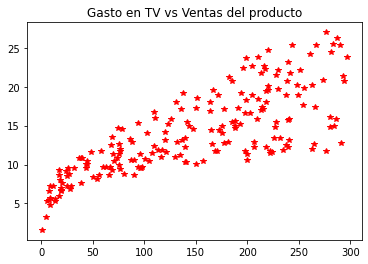

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data_ads["TV"], data["Sales"],"r*")
plt.title("Gasto en TV vs Ventas del producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del producto')

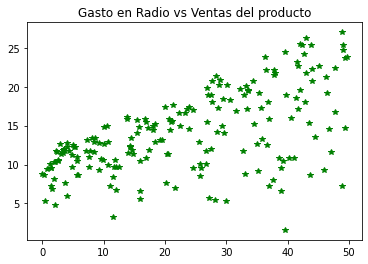

In [ ]:
plt.plot(data_ads["Radio"], data["Sales"],"g*")
plt.title("Gasto en Radio vs Ventas del producto")

Text(0.5, 1.0, 'Gasto en Newspaper vs Ventas del producto')

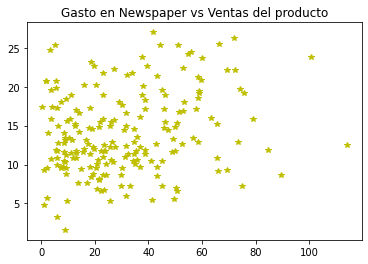

In [ ]:
plt.plot(data_ads["Newspaper"], data["Sales"],"y*")
plt.title("Gasto en Newspaper vs Ventas del producto")

In [ ]:
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


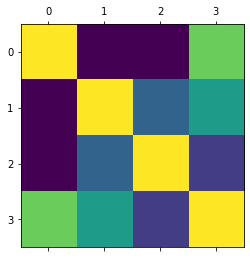

In [ ]:
plt.matshow(data_ads.corr())